In [1]:
import os
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/home/growlt199/Downloads/manufacturing_project/data/flight_processed_data.csv",index_col=0)

In [3]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [4]:
#done label encoding in flight column
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,1408,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,1387,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,1213,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,1559,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,1549,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


<Axes: >

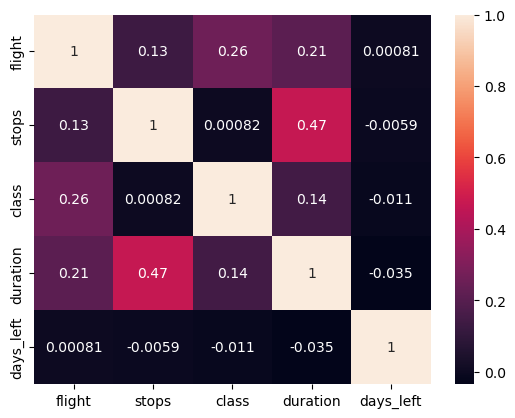

In [6]:
#correlation matrix of data
sn.heatmap(df.iloc[:,:-1].corr(),annot=True)

In [7]:
def data_to_one_hot(df):
    # get dummy variables for multiple columns
    dummy_cols = ['airline', 'departure_time','arrival_time','source_city','destination_city']
    df1_dummy = pd.get_dummies(df[dummy_cols])

    # concatenate original DataFrame with dummy variable DataFrame
    df1_concat = pd.concat([df.drop(dummy_cols, axis=1), df1_dummy], axis=1)
    
    # display result
    return df1_concat

In [8]:
def data_label_encoding(df):
    from sklearn.preprocessing import LabelEncoder

    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Specify the list of categorical columns to encode
    categorical_columns = ['airline', 'departure_time','arrival_time','source_city','destination_city']

    # Apply label encoding to each categorical column
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df

In [9]:
def spilt_data(train_data,test_data):
    #create x and y where x are features for the model and y as target
    x_train = train_data.drop('price',axis=1)
    y_train = train_data['price']

    #for test data, create x and y where x are features for the model and y as target
    x_test = test_data.drop('price',axis=1)
    y_test = test_data['price']
    
    return x_train,y_train,x_test,y_test

In [10]:
def spilt_inti_x_y(data):
    
    #for test data, create x and y where x are features for the model and y as target
    x = test_data.drop('price',axis=1)
    y = test_data['price']
    return x,y

In [11]:
def divide_into_train_test(data,part):
    
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=part, random_state=123)
    return train_data,test_data

In [12]:
def model_random_forest(x_train,y_train,x_test,y_test):

    import time

    start_time = time.time()
    
    #model 
    regr = RandomForestRegressor(random_state=123)

    #training model input as x_train and y_tarin
    regr.fit(x_train,y_train)

    #model is creted show give x test data as input and retuen predictd data 
    predictions = regr.predict(x_test)
   
    '''
     #MAE
    print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

    #MSE
    print('MSE:-',metrics.mean_squared_error(y_test,predictions))

    #RMSE
    print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

    #r2
    print("r2",r2_score(y_test, predictions))
    '''
    
    # evaluation
    data = [
        ["MAE",metrics.mean_absolute_error(y_test,predictions)],
        ["MSE",metrics.mean_squared_error(y_test,predictions)],
        ["RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions))],
        ["r2",r2_score(y_test, predictions)],
        ["explained_variance_score",metrics.explained_variance_score(y_test, predictions)],
        ["max_error",metrics.max_error(y_test, predictions)],
        ["mean_absolute_percentage_error",metrics.mean_absolute_percentage_error(y_test, predictions)],
        ["mean_squared_log_error",metrics.mean_squared_log_error(y_test, predictions)],
        ["mean_squared_log_error(squared=False)",metrics.mean_squared_log_error(y_test, predictions, squared=False)]
    ]

    # Define the headers
    headers = ["metrics", "value"]

    # Display the data in a tabular format
    table = tabulate(data, headers, tablefmt="grid")
    print(table)
    
    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    
    return regr,predictions

In [13]:
def model_into_pickle(model, filename):

    # Create the directory if it doesn't exist
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the model to the specified filename
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [14]:
def predict_with_model(data, model_path):
    # Load the model from the pickle file
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Make predictions on the new data
    predictions = model.predict(data)
    
    return predictions

In [15]:
def testing_new_data(data,filename_1,filename_2,filename_3):
    
    #convert into one hot and label sncoding 
    data_1 = data_to_one_hot(data)
    data_2 = data_label_encoding(data)
    
    # Make predictions on the new data
    predictions_1 = predict_with_model(data_1, filename_1)
    predictions_2 = predict_with_model(data_2, filename_2)
    
    # Stack the predictions horizontally
    stacked_predictions = np.column_stack((predictions_1, predictions_2))

    # Combine original features with stacked predictions
    X_stacked = np.column_stack((data_1,data_2,stacked_predictions))
    
    final_prediction = predict_with_model(X_stacked, filename_3)
    
    return predictions_1,predictions_2,final_prediction

In [16]:
#final script

#split data into two part where one is train main part and econd main test part
train_data,test_data = divide_into_train_test(df,0.10)

#devide train data into data 1 and data 2 for one hot and klabel encoding
data_1 = data_to_one_hot(train_data)
data_2 = data_label_encoding(train_data)

#divide data1 and data 2 into two part train and test
train_data_1,test_data_1 = divide_into_train_test(data_1,0.3)
train_data_2,test_data_2 = divide_into_train_test(data_2,0.3)

#divide train test into fetures and target
X_train_1,y_train_1,X_test_1,y_test_1=spilt_data(train_data_1,test_data_1)
X_train_2,y_train_2,X_test_2,y_test_2=spilt_data(train_data_2,test_data_2)

#model train part 
print('-------------------------------model:1(one hot encoding)-------------------------------------')
print( )
model_1,predictions_1 = model_random_forest(X_train_1,y_train_1,X_test_1,y_test_1)
print( )
print('-------------------------------model:2(label encoding)---------------------------------------')
print( )
model_2,predictions_2 = model_random_forest(X_train_2,y_train_2,X_test_2,y_test_2)
print( )

#dump in pickle file 
filename_1 = '/home/growlt199/Downloads/manufacturing_project/model_training/model_stacking/model_1_random_forest_regression.pkl'
filename_2 = '/home/growlt199/Downloads/manufacturing_project/model_training/model_stacking/model_2_random_forest_regression.pkl'

model_into_pickle(model_1,filename_1)
model_into_pickle(model_2,filename_2)

# Stack the predictions horizontally
stacked_predictions = np.column_stack((predictions_1, predictions_2))

# Combine original features with stacked predictions
X_stacked = np.column_stack((X_test_1,X_test_2, stacked_predictions))

# Second-level model
meta_model =  RandomForestRegressor(random_state=123)

# Train the second-level model using combined features
meta_model.fit(X_stacked, y_test_1)

#dump into pickle file
filename_3 = '/home/growlt199/Downloads/manufacturing_project/model_training/model_stacking/meta_model_random_forest_regression.pkl'
model_into_pickle(meta_model,filename_3)

-------------------------------model:1(one hot encoding)-------------------------------------

+---------------------------------------+-----------------+
| metrics                               |           value |
+=======================================+=================+
| MAE                                   |   868.626       |
+---------------------------------------+-----------------+
| MSE                                   |     4.97289e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2230           |
+---------------------------------------+-----------------+
| r2                                    |     0.990143    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.990146    |
+---------------------------------------+-----------------+
| max_error                             | 44640.6         |
+---------------------------------------+-----------------+
| mea

In [ ]:
------------------model:1(one hot encoding)-------------------------------------

+=======================================+=================+
| MAE                                   |   868.626       |
+---------------------------------------+-----------------+
| MSE                                   |     4.97289e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2230           |
+---------------------------------------+-----------------+
| r2                                    |     0.990143    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.990146    |
+---------------------------------------+-----------------+
| max_error                             | 44640.6         |
+---------------------------------------+-----------------+
| mean_absolute_percentage_error        |     0.0604803   |
+---------------------------------------+-----------------+
| mean_squared_log_error                |     0.0154814   |
+---------------------------------------+-----------------+
| mean_squared_log_error(squared=False) |     0.124424    |
+---------------------------------------+-----------------+
Execution time: 48.94217896461487 seconds

---------------------model:2(label encoding)---------------------------------------
+=======================================+=================+
| MAE                                   |   880.989       |
+---------------------------------------+-----------------+
| MSE                                   |     5.08948e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2255.99        |
+---------------------------------------+-----------------+
| r2                                    |     0.989912    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.989915    |
+---------------------------------------+-----------------+
| max_error                             | 41416.9         |
+---------------------------------------+-----------------+
| mean_absolute_percentage_error        |     0.0614381   |
+---------------------------------------+-----------------+
| mean_squared_log_error                |     0.0158267   |
+---------------------------------------+-----------------+
| mean_squared_log_error(squared=False) |     0.125804    |
+---------------------------------------+-----------------+
Execution time: 31.99786376953125 seconds

# testing in new data 

In [17]:
#final test
test_data_x,test_data_y = spilt_inti_x_y(test_data)

#final prediction 
predit_1,prdict_2,final_predictions = testing_new_data(test_data_x,filename_1,filename_2,filename_3)

'''
#MAE
print('MAE:-',metrics.mean_absolute_error(test_data_y,final_predictions))

#MSE
print('MSE:-',metrics.mean_squared_error(test_data_y,final_predictions))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(test_data_y,final_predictions)))

#r2
print("r2",r2_score(test_data_y, final_predictions))

#explained_variance_score
print("explained_variance_score:- ",metrics.explained_variance_score(test_data_y, final_predictions))
    
#max_error
print("max_error:- ",metrics.max_error())
'''
print('-------------------------------final model---------------------------------------')
print( )
# evaluation
data = [
    ["MAE",metrics.mean_absolute_error(test_data_y, final_predictions)],
    ["MSE",metrics.mean_squared_error(test_data_y, final_predictions)],
    ["RMSE",np.sqrt(metrics.mean_squared_error(test_data_y, final_predictions))],
    ["r2",r2_score(test_data_y, final_predictions)],
    ["explained_variance_score",metrics.explained_variance_score(test_data_y, final_predictions)],
    ["max_error",metrics.max_error(test_data_y, final_predictions)],
    ["mean_absolute_percentage_error",metrics.mean_absolute_percentage_error(test_data_y, final_predictions)],
    ["mean_squared_log_error",metrics.mean_squared_log_error(test_data_y, final_predictions)],
    ["mean_squared_log_error(squared=False)",metrics.mean_squared_log_error(test_data_y, final_predictions, squared=False)]
]

# Define the headers
headers = ["metrics", "value"]

# Display the data in a tabular format
table = tabulate(data, headers, tablefmt="grid")
print(table)

-------------------------------final model---------------------------------------

+---------------------------------------+-----------------+
| metrics                               |           value |
+=======================================+=================+
| MAE                                   |   895.168       |
+---------------------------------------+-----------------+
| MSE                                   |     4.93897e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2222.38        |
+---------------------------------------+-----------------+
| r2                                    |     0.990278    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.990281    |
+---------------------------------------+-----------------+
| max_error                             | 33002.7         |
+---------------------------------------+-----------------+
| mean_absolute_p

In [ ]:
------------------------final model---------------------------------------
+=======================================+=================+
| MAE                                   |   895.168       |
+---------------------------------------+-----------------+
| MSE                                   |     4.93897e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2222.38        |
+---------------------------------------+-----------------+
| r2                                    |     0.990278    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.990281    |
+---------------------------------------+-----------------+
| max_error                             | 33002.7         |
+---------------------------------------+-----------------+
| mean_absolute_percentage_error        |     0.0622902   |
+---------------------------------------+-----------------+
| mean_squared_log_error                |     0.0156472   |
+---------------------------------------+-----------------+
| mean_squared_log_error(squared=False) |     0.125089    |
+---------------------------------------+-----------------+

In [17]:

transposed_data = list(zip(*data))

for row in transposed_data:
    print(row)


('MAE', 'MSE', 'RMSE', 'r2', 'explained_variance_score', 'max_error', 'mean_absolute_percentage_error', 'mean_squared_log_error', 'mean_squared_log_error(squared=False)')
(897.6444030060463, 4898718.055766041, 2213.3047814898973, 0.9903143470846589, 0.9903196909453633, 33426.53, 0.062361527303456905, 0.015632347826201327, 0.12502938785022236)


In [18]:
list(transposed_data[1])

[897.6444030060463,
 4898718.055766041,
 2213.3047814898973,
 0.9903143470846589,
 0.9903196909453633,
 33426.53,
 0.062361527303456905,
 0.015632347826201327,
 0.12502938785022236]

In [19]:
len(test_data_y)

44825

In [20]:
len(predit_1)

44825

In [21]:
len(prdict_2)

44825

In [22]:
len(final_predictions)

44825

In [26]:
import pandas as pd
import numpy as np

# Assuming you have one dataframe: df
# and three arrays: array1, array2, array3

# Convert arrays to dataframes
array1_df = pd.DataFrame({'predict_1': predit_1})
array2_df = pd.DataFrame({'predict_2': prdict_2})
array3_df = pd.DataFrame({'final_predictions': final_predictions})

# Merge the dataframe and arrays horizontally (column-wise) without including indices
model_stacking_results_with_flight = pd.concat([test_data_x[['duration','days_left']].reset_index(drop=True),test_data_y.reset_index(drop=True), array1_df, array2_df, array3_df], axis=1)

# Save the merged dataframe to a CSV file
model_stacking_results_with_flight.to_csv('model_stacking_results_with_flight.csv', index=False)


In [27]:
model_stacking_results_with_flight.head(10)

,duration,days_left,price,predict_1,predict_2,final_predictions
0,17.17,47,38554,38725.84,39402.73,38361.60
1,26.42,46,6312,5473.89,5797.43,5219.71
2,20.92,10,15606,14952.98,14700.37,15671.72
3,13.08,14,15537,11255.25,11002.10,11590.58
4,13.00,21,5960,5997.77,5987.04,5968.14
5,13.25,29,44280,44280.00,44280.00,44280.00
6,21.00,42,6578,6589.67,6598.72,6596.12
7,5.58,14,12118,10654.00,10278.40,8444.83
8,7.83,47,6067,6067.00,6067.00,6067.00
9,7.25,24,5178,4846.29,4964.25,4758.87


# cerating bins of actual price - predicted price to visualizing the results

In [30]:
model_stacking_results_with_flight['model_1_error']=abs(model_stacking_results_with_flight['price']-model_stacking_results_with_flight['predict_1'])

In [31]:
model_stacking_results_with_flight['model_2_error']=abs(model_stacking_results_with_flight['price']-model_stacking_results_with_flight['predict_2'])

In [32]:
model_stacking_results_with_flight['model_3_error']=abs(model_stacking_results_with_flight['price']-model_stacking_results_with_flight['final_predictions'])

In [33]:
model_stacking_results_with_flight.head(10)

,duration,days_left,price,predict_1,predict_2,final_predictions,model_1_error,model_2_error,model_3_error
0,17.17,47,38554,38725.84,39402.73,38361.60,171.84,848.73,192.40
1,26.42,46,6312,5473.89,5797.43,5219.71,838.11,514.57,1092.29
2,20.92,10,15606,14952.98,14700.37,15671.72,653.02,905.63,65.72
3,13.08,14,15537,11255.25,11002.10,11590.58,4281.75,4534.90,3946.42
4,13.00,21,5960,5997.77,5987.04,5968.14,37.77,27.04,8.14
5,13.25,29,44280,44280.00,44280.00,44280.00,0.00,0.00,0.00
6,21.00,42,6578,6589.67,6598.72,6596.12,11.67,20.72,18.12
7,5.58,14,12118,10654.00,10278.40,8444.83,1464.00,1839.60,3673.17
8,7.83,47,6067,6067.00,6067.00,6067.00,0.00,0.00,0.00
9,7.25,24,5178,4846.29,4964.25,4758.87,331.71,213.75,419.13


In [34]:
results= model_stacking_results_with_flight.copy()

In [35]:
results.head()

,duration,days_left,price,predict_1,predict_2,final_predictions,model_1_error,model_2_error,model_3_error
0,17.17,47,38554,38725.84,39402.73,38361.60,171.84,848.73,192.40
1,26.42,46,6312,5473.89,5797.43,5219.71,838.11,514.57,1092.29
2,20.92,10,15606,14952.98,14700.37,15671.72,653.02,905.63,65.72
3,13.08,14,15537,11255.25,11002.10,11590.58,4281.75,4534.90,3946.42
4,13.00,21,5960,5997.77,5987.04,5968.14,37.77,27.04,8.14


In [50]:
results.describe()

,duration,days_left,price,predict_1,predict_2,final_predictions,model_1_error,model_2_error,model_3_error,model_1_error_bin
count,44825.000000,44825.000000,44825.000000,44825.000000,44825.000000,44825.000000,44825.000000,44825.000000,44825.000000,44825.000000
mean,12.162652,26.073753,20801.694077,20831.528345,20838.857192,20853.682224,870.450922,886.335124,897.644403,1.465142
std,7.112917,13.514959,22489.594016,22426.037915,22428.810411,22436.175851,2045.556528,2073.275661,2023.127256,4.005907
min,0.830000,1.000000,1105.000000,1105.000000,1105.000000,1105.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,15.000000,4757.000000,4862.000000,4854.780000,4843.830000,5.120000,4.980000,15.810000,0.000000
50%,11.250000,26.000000,7425.000000,7477.480000,7492.800000,7470.100000,132.450000,135.200000,161.760000,0.000000
75%,16.080000,38.000000,42521.000000,42521.000000,42521.000000,42521.000000,670.200000,692.570000,742.730000,1.000000
max,33.750000,49.000000,88911.000000,84888.580000,84756.000000,85229.520000,40373.140000,32175.580000,33426.530000,80.000000


# for model 1, plot bins 

In [59]:
# Create bins with a width of 100
bins = range(int(results['model_1_error'].min()), int(results['model_1_error'].max()) + 101,100)

# Create a new column 'price_bin' to store the bin labels
results['model_1_error_bin'] = pd.cut(results['model_1_error'], bins=bins, labels=False, include_lowest=True)

# Optionally, you can assign labels to the bins instead of using numerical values
# bin_labels = ['Bin {}'.format(i) for i in range(len(bins) - 1)]
# df['price_bin'] = pd.cut(df['price'], bins=bins, labels=bin_labels, include_lowest=True)

# Print the updated data frame

results.head()

,duration,days_left,price,predict_1,predict_2,final_predictions,model_1_error,model_2_error,model_3_error,model_1_error_bin,model_2_error_bin,model_3_error_bin
0,17.17,47,38554,38725.84,39402.73,38361.60,171.84,848.73,192.40,1,0,0
1,26.42,46,6312,5473.89,5797.43,5219.71,838.11,514.57,1092.29,8,0,1
2,20.92,10,15606,14952.98,14700.37,15671.72,653.02,905.63,65.72,6,0,0
3,13.08,14,15537,11255.25,11002.10,11590.58,4281.75,4534.90,3946.42,42,4,3
4,13.00,21,5960,5997.77,5987.04,5968.14,37.77,27.04,8.14,0,0,0


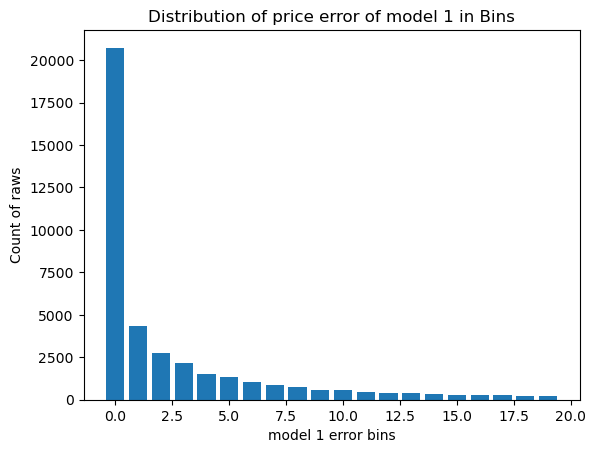

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data frame by price bins and count the number of occurrences in each bin
bin_counts = results.groupby('model_1_error_bin').size()

# Plot the bar chart
plt.bar(bin_counts.index[:20], bin_counts.values[:20])

# Add labels and title to the plot
plt.xlabel('model 1 error bins')
plt.ylabel('Count of raws')
plt.title('Distribution of price error of model 1 in Bins')

# Show the plot
plt.show()


# for model 2, plot bins

In [62]:
# Create bins with a width of 100
bins = range(int(results['model_2_error'].min()), int(results['model_2_error'].max()) + 101,100)

# Create a new column 'price_bin' to store the bin labels
results['model_2_error_bin'] = pd.cut(results['model_2_error'], bins=bins, labels=False, include_lowest=True)

# Optionally, you can assign labels to the bins instead of using numerical values
# bin_labels = ['Bin {}'.format(i) for i in range(len(bins) - 1)]
# df['price_bin'] = pd.cut(df['price'], bins=bins, labels=bin_labels, include_lowest=True)

# Print the updated data frame

results.head()

,duration,days_left,price,predict_1,predict_2,final_predictions,model_1_error,model_2_error,model_3_error,model_1_error_bin,model_2_error_bin,model_3_error_bin
0,17.17,47,38554,38725.84,39402.73,38361.60,171.84,848.73,192.40,1,8,0
1,26.42,46,6312,5473.89,5797.43,5219.71,838.11,514.57,1092.29,8,5,1
2,20.92,10,15606,14952.98,14700.37,15671.72,653.02,905.63,65.72,6,9,0
3,13.08,14,15537,11255.25,11002.10,11590.58,4281.75,4534.90,3946.42,42,45,3
4,13.00,21,5960,5997.77,5987.04,5968.14,37.77,27.04,8.14,0,0,0


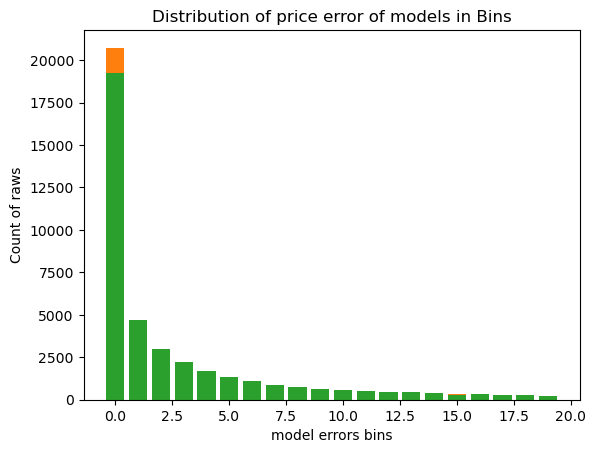

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data frame by price bins and count the number of occurrences in each bin
bin_counts = results.groupby('model_1_error_bin').size()
# Plot the bar chart
plt.bar(bin_counts.index[:20], bin_counts.values[:20],label='model 1 error')

# Group the data frame by price bins and count the number of occurrences in each bin
bin_counts = results.groupby('model_2_error_bin').size()
# Plot the bar chart
plt.bar(bin_counts.index[:20], bin_counts.values[:20],label='model 2 error')

# Group the data frame by price bins and count the number of occurrences in each bin
bin_counts = results.groupby('model_3_error_bin').size()
# Plot the bar chart
plt.bar(bin_counts.index[:20], bin_counts.values[:20],label='model 3 error')



# Add labels and title to the plot
plt.xlabel('model errors bins')
plt.ylabel('Count of raws')
plt.title('Distribution of price error of models in Bins')

# Show the plot
plt.show()


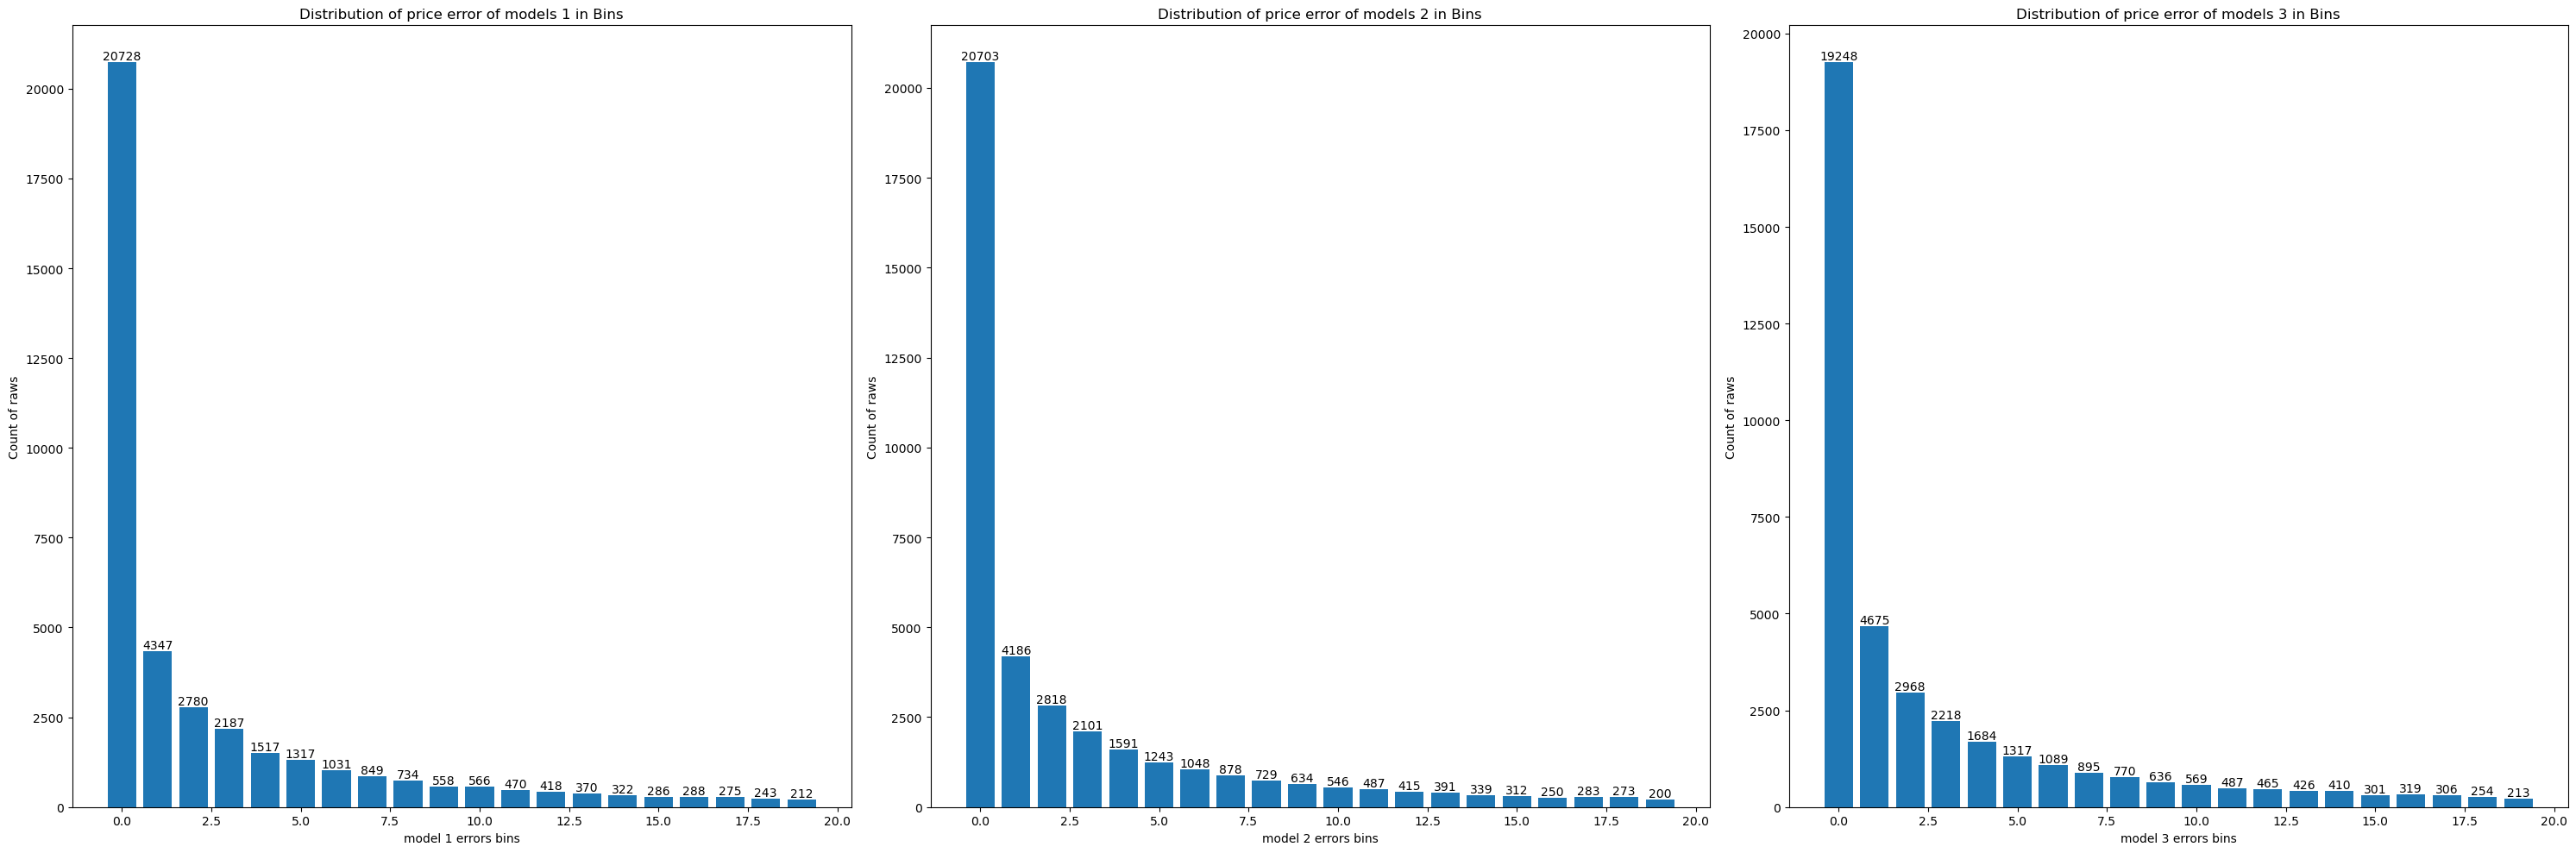

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have three data frames called 'df1', 'df2', and 'df3' with corresponding price bin columns

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10))


# Plot the first bar chart
bin_counts1 = results.groupby('model_1_error_bin').size()
axs[0].bar(bin_counts1.index[:20], bin_counts1.values[:20],label='model 1 error')
axs[0].set_xlabel('model 1 errors bins')
axs[0].set_ylabel('Count of raws')
axs[0].set_title('Distribution of price error of models 1 in Bins')

# Add data labels to the first bar plot
for i, count in enumerate(bin_counts1.values[:20]):
    axs[0].text(bin_counts1[:20].index[i], count, str(count), ha='center', va='bottom')


# Plot the second bar chart
bin_counts2 = results.groupby('model_2_error_bin').size()
axs[1].bar(bin_counts2.index[:20], bin_counts2.values[:20])
axs[1].set_xlabel('model 2 errors bins')
axs[1].set_ylabel('Count of raws')
axs[1].set_title('Distribution of price error of models 2 in Bins')

# Add data labels to the second bar plot
for i, count in enumerate(bin_counts2.values[:20]):
    axs[1].text(bin_counts2[:20].index[i], count, str(count), ha='center', va='bottom')


# Plot the third bar chart
bin_counts3 = results.groupby('model_3_error_bin').size()
axs[2].bar(bin_counts3.index[:20], bin_counts3.values[:20])
axs[2].set_xlabel('model 3 errors bins')
axs[2].set_ylabel('Count of raws')
axs[2].set_title('Distribution of price error of models 3 in Bins')

# Add data labels to the third bar plot
for i, count in enumerate(bin_counts3.values[:20]):
    axs[2].text(bin_counts3[:20].index[i], count, str(count), ha='center', va='bottom')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


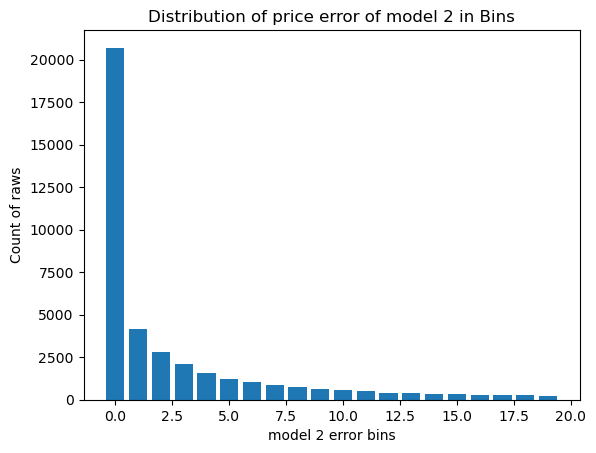

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data frame by price bins and count the number of occurrences in each bin
bin_counts = results.groupby('model_2_error_bin').size()

# Plot the bar chart
plt.bar(bin_counts.index[:20], bin_counts.values[:20])

# Add labels and title to the plot
plt.xlabel('model 2 error bins')
plt.ylabel('Count of raws')
plt.title('Distribution of price error of model 2 in Bins')

# Show the plot
plt.show()


# for model 3, plot bins

In [64]:
# Create bins with a width of 100
bins = range(int(results['model_3_error'].min()), int(results['model_3_error'].max()) + 101,100)

# Create a new column 'price_bin' to store the bin labels
results['model_3_error_bin'] = pd.cut(results['model_3_error'], bins=bins, labels=False, include_lowest=True)

# Optionally, you can assign labels to the bins instead of using numerical values
# bin_labels = ['Bin {}'.format(i) for i in range(len(bins) - 1)]
# df['price_bin'] = pd.cut(df['price'], bins=bins, labels=bin_labels, include_lowest=True)

# Print the updated data frame

results.head()

,duration,days_left,price,predict_1,predict_2,final_predictions,model_1_error,model_2_error,model_3_error,model_1_error_bin,model_2_error_bin,model_3_error_bin
0,17.17,47,38554,38725.84,39402.73,38361.60,171.84,848.73,192.40,1,8,1
1,26.42,46,6312,5473.89,5797.43,5219.71,838.11,514.57,1092.29,8,5,10
2,20.92,10,15606,14952.98,14700.37,15671.72,653.02,905.63,65.72,6,9,0
3,13.08,14,15537,11255.25,11002.10,11590.58,4281.75,4534.90,3946.42,42,45,39
4,13.00,21,5960,5997.77,5987.04,5968.14,37.77,27.04,8.14,0,0,0


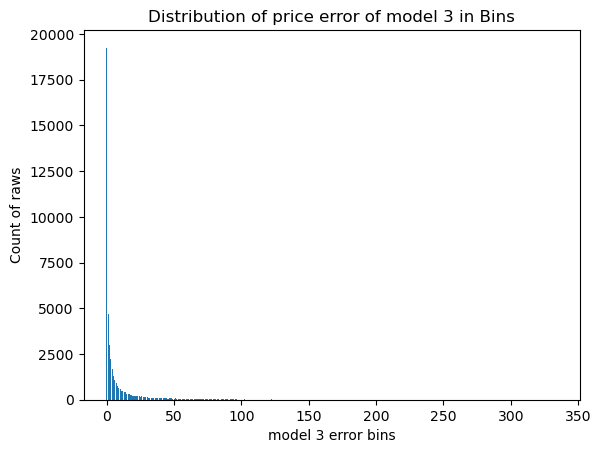

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data frame by price bins and count the number of occurrences in each bin
bin_counts = results.groupby('model_3_error_bin').size()

# Plot the bar chart
plt.bar(bin_counts.index, bin_counts.values)

# Add labels and title to the plot
plt.xlabel('model 3 error bins')
plt.ylabel('Count of raws')
plt.title('Distribution of price error of model 3 in Bins')

# Show the plot
plt.show()


# raff

In [54]:
# Get unique values
unique_values = model_stacking_results_with_flight['duration'].unique()

# Create an empty dataframe
random_rows_day_left = pd.DataFrame() 

# Loop through unique values and select random rows
for value in unique_values:
    random_row = model_stacking_results_with_flight[model_stacking_results_with_flight['duration'] == value].sample(n=1, random_state=42)
    random_rows_day_left = pd.concat([random_rows_day_left, random_row])

# Print the randomly selected rows
print(random_rows_day_left)


       duration  days_left  price      predit_1    prdict_2  final_predictions
9240      17.17         13  12166  11751.550000  11855.6600       12075.690000
15844     26.42          5  53164  53196.930000  53186.4000       53183.930000
18857     20.92          9  11469  10479.870000  10694.7400       10953.960000
12150     13.08         35   4413   4699.940000   4684.6475        4645.060000
12128     13.00         47   4979   5255.810000   5231.9700        5732.350000
...         ...        ...    ...           ...         ...                ...
31624     29.25          2  12939  16874.780000  16719.5800       18415.603333
43265     32.50         13  11679  11872.580000  12975.1700       12629.258000
39562     33.33         22   7900   8105.783333   8642.7800        8639.460000
43326     32.42         42   8258   7740.670000   7495.2400        7294.970000
41627     29.33         19   8789   8617.270000   8774.1135        8579.160000

[392 rows x 6 columns]


In [58]:
random_rows_day_left = random_rows_day_left.sort_values(['duration','price','final_predictions'])

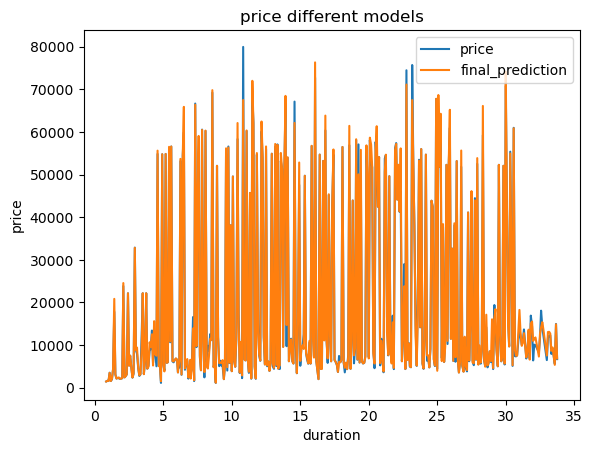

In [60]:
# Plot the lines
plt.plot(random_rows_day_left['duration'],random_rows_day_left['price'], label='price')
#plt.plot(random_rows_day_left['days_left'],random_rows_day_left['predit_1'], label='predit_1')
#plt.plot(random_rows_day_left['days_left'],random_rows_day_left['prdict_2'], label='prdict_2')
plt.plot(random_rows_day_left['duration'],random_rows_day_left['final_predictions'], label='final_prediction')

# Set labels and title
plt.xlabel('duration')
plt.ylabel('price')
plt.title('price different models')

# Add a legend
plt.legend()

# Show the chart
plt.show()